In [10]:
#5/6/24 Attempt at creating an Autoencoder specifically for classification
#Differs from the other notebook as a new autoencoder is made from scratch rather than loading an existing model

import pandas as pd
import numpy as np
#Data import
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/Targetdata/DrugTargets.csv')

#Creating test/train splits
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=82)
#Converts Toxicity Values to a list
temp = trainset['Toxicity_Value']
ytrain = []
for items in temp:
    ytrain.append(items)
ytest = testset['Toxicity_Value']
#Converts encoded drug target values to an array
xtrain = trainset.iloc[:, 2:].values
xtest = testset.iloc[:, 2:].values

<bound method IndexOpsMixin.tolist of 9328     0
7448     0
11904    0
9483     0
9221     0
        ..
3421     0
7117     0
8323     1
4546     0
12419    0
Name: Toxicity_Value, Length: 10595, dtype: int64>

In [59]:
import tensorflow as tf
from tensorflow import keras

# Determines layer size and input/output
# Here it turns the 334 one hot encoded features to 42
keras.utils.set_random_seed(81)
tf.config.experimental.enable_op_determinism()
length = len(xtrain[0])

# Encoder Creation
enc_in = keras.Input(shape=(length, 1))
x = keras.layers.Flatten()(enc_in)

# Additional encoder layers
x = keras.layers.Dense(160, activation="relu")(x)
x = keras.layers.Dense(81, activation="relu")(x)
x = keras.layers.Dense(42, activation="relu")(x)
x = keras.layers.Dense(20, activation="relu")(x)
x = keras.layers.Dense(10, activation="relu")(x)

enc_out = keras.layers.Dense(1, activation="sigmoid")(x)
autoencoder = keras.Model(enc_in, enc_out, name='autoencoder')

# Optimiser
optimise = tf.keras.optimizers.Adam()

autoencoder.compile(optimise, loss='binary_crossentropy')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 334, 1)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 334)               0         
                                                                 
 dense_15 (Dense)            (None, 160)               53600     
                                                                 
 dense_16 (Dense)            (None, 81)                13041     
                                                                 
 dense_17 (Dense)            (None, 42)                3444      
                                                                 
 dense_18 (Dense)            (None, 20)                860       
                                                                 
 dense_19 (Dense)            (None, 10)                

In [65]:
#Runs and creates the autoencoder and outputs parameters to a specs file
ytrain = np.array(ytrain)
epochs = 100
batchsize = 32
losshistory = []
vallosshistory = []
for epoch in range(epochs):
    logs = autoencoder.fit(
    xtrain,
    ytrain,
    epochs=1,
    batch_size=batchsize)
    
    #autoencoder.save(str(f"models/AE-{epoch+1}.keras"))
    losshistory.append(logs.history['loss'])
autoencoder.save(str(f"test/AE-{epoch+1}.keras"))
    

224/332 [===================>..........] - ETA: 0s - loss: 0.3419

2024-06-05 23:41:31.029908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:31.030056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3448

2024-06-05 23:41:31.285649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:31.285784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.3364

2024-06-05 23:41:31.531682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:31.531812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3351

2024-06-05 23:41:31.782341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:31.782475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3354

2024-06-05 23:41:32.027294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:32.027428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.3383

2024-06-05 23:41:32.269269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:32.269404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.3376

2024-06-05 23:41:32.506898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:32.507027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.3240

2024-06-05 23:41:32.759879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:32.760023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.3262

2024-06-05 23:41:33.009987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:33.010125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.3361

2024-06-05 23:41:33.249366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:33.249496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.3399

2024-06-05 23:41:33.494312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:33.494441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.3372

2024-06-05 23:41:33.740296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:41:33.740408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


203/332 [=================>............] - ETA: 0s - loss: 0.3375

2024-06-05 23:41:33.983098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:41:33.983219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.3565

2024-06-05 23:41:34.274248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:34.274375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.3412

2024-06-05 23:41:34.525771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:34.525905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.3413

2024-06-05 23:41:34.770075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:34.770206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3393

2024-06-05 23:41:35.014416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:35.014546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3364

2024-06-05 23:41:35.257756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:41:35.257892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.3405

2024-06-05 23:41:35.502338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:35.502471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.3329

2024-06-05 23:41:35.738990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:35.739130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3325

2024-06-05 23:41:35.985614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:35.985741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.3318

2024-06-05 23:41:36.227246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:36.227377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.3313

2024-06-05 23:41:36.474384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:36.474542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.3305

2024-06-05 23:41:36.724935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:36.725067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.3332

2024-06-05 23:41:36.965044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:36.965171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


254/332 [=====================>........] - ETA: 0s - loss: 0.3218

2024-06-05 23:41:37.198694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:41:37.198823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.3301

2024-06-05 23:41:37.425114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:37.425242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.3288

2024-06-05 23:41:37.668741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:37.668874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.3346

2024-06-05 23:41:37.910364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:37.910493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.3200

2024-06-05 23:41:38.147539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:38.147666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.3285

2024-06-05 23:41:38.383040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:38.383167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.3187

2024-06-05 23:41:38.616553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:38.616681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.3154

2024-06-05 23:41:38.859853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:38.859982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


219/332 [==================>...........] - ETA: 0s - loss: 0.3120

2024-06-05 23:41:39.102368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:39.102498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.3194

2024-06-05 23:41:39.353945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:39.354076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.3179

2024-06-05 23:41:39.594782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:39.594913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.3210

2024-06-05 23:41:39.841237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:39.841366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


220/332 [==================>...........] - ETA: 0s - loss: 0.3122

2024-06-05 23:41:40.094549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:40.094672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.3099

2024-06-05 23:41:40.352215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:40.352347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.3074

2024-06-05 23:41:40.595611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:40.595741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.3139

2024-06-05 23:41:40.835339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:40.835479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.3112

2024-06-05 23:41:41.083240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:41.083371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.3146

2024-06-05 23:41:41.321872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:41.322002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.3073

2024-06-05 23:41:41.568882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:41.569012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.3177

2024-06-05 23:41:41.801553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:41.801684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


257/332 [======================>.......] - ETA: 0s - loss: 0.3079

2024-06-05 23:41:42.041181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:42.041312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.3083

2024-06-05 23:41:42.265708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:42.265839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.3171

2024-06-05 23:41:42.503540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:42.503669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.3199

2024-06-05 23:41:42.739312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:42.739444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.3188

2024-06-05 23:41:42.984426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:42.984558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3158

2024-06-05 23:41:43.225833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:43.225961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.3113

2024-06-05 23:41:43.469444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:43.469580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


217/332 [==================>...........] - ETA: 0s - loss: 0.3105

2024-06-05 23:41:43.712716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:43.712826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.3098

2024-06-05 23:41:43.973904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:43.974034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.3115

2024-06-05 23:41:44.220459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:44.220588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.3152

2024-06-05 23:41:44.467218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:44.467343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3156

2024-06-05 23:41:44.712654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:44.712779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.3185

2024-06-05 23:41:44.954286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:44.954417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.3120

2024-06-05 23:41:45.195485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:45.195611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.3127

2024-06-05 23:41:45.432732: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:45.432856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.3120

2024-06-05 23:41:45.667960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:45.668088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.3149

2024-06-05 23:41:45.910436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:45.910568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.3145

2024-06-05 23:41:46.152162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:46.152293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.3158

2024-06-05 23:41:46.400534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:46.400663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.3148

2024-06-05 23:41:46.644333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:46.644463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.3163

2024-06-05 23:41:46.884054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:46.884187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.3118

2024-06-05 23:41:47.135240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:47.135383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.3132

2024-06-05 23:41:47.382929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:47.383059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.3138

2024-06-05 23:41:47.628037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:47.628167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.3182

2024-06-05 23:41:47.876339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:47.876469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


253/332 [=====================>........] - ETA: 0s - loss: 0.3155

2024-06-05 23:41:48.115380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:48.115507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.3052

2024-06-05 23:41:48.342218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:48.342346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.3039

2024-06-05 23:41:48.584490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:48.584618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.3098

2024-06-05 23:41:48.826344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:48.826474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.3089

2024-06-05 23:41:49.073384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:49.073511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2997

2024-06-05 23:41:49.315141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:49.315269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2999

2024-06-05 23:41:49.562585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:49.562716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.3024

2024-06-05 23:41:49.814177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:49.814294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.3066

2024-06-05 23:41:50.060567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:50.060681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


254/332 [=====================>........] - ETA: 0s - loss: 0.3003

2024-06-05 23:41:50.304076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:50.304206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2972

2024-06-05 23:41:50.530094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:50.530222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


249/332 [=====================>........] - ETA: 0s - loss: 0.2937

2024-06-05 23:41:50.763016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:50.763153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


254/332 [=====================>........] - ETA: 0s - loss: 0.2949

2024-06-05 23:41:50.993481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:50.993632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.3011

2024-06-05 23:41:51.223749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:51.223892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.3117

2024-06-05 23:41:51.471361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:51.471492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


247/332 [=====================>........] - ETA: 0s - loss: 0.2982

2024-06-05 23:41:51.714839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:51.714958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.3031

2024-06-05 23:41:51.947700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:41:51.947829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.3106

2024-06-05 23:41:52.188169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:52.188298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.3010

2024-06-05 23:41:52.433336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:52.433466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


247/332 [=====================>........] - ETA: 0s - loss: 0.3022

2024-06-05 23:41:52.675487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:52.675617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.3019

2024-06-05 23:41:52.907028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:52.907156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2997

2024-06-05 23:41:53.154646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:41:53.154772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.3004

2024-06-05 23:41:53.401373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:53.401500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.3020

2024-06-05 23:41:53.646764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:53.646893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.3019

2024-06-05 23:41:53.888564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:53.888697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


221/332 [==================>...........] - ETA: 0s - loss: 0.2983

2024-06-05 23:41:54.132353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:54.132483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.3014

2024-06-05 23:41:54.387881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:54.388009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


253/332 [=====================>........] - ETA: 0s - loss: 0.2969

2024-06-05 23:41:54.630591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:54.630724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


252/332 [=====================>........] - ETA: 0s - loss: 0.2978

2024-06-05 23:41:54.857959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:54.858093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2977

2024-06-05 23:41:55.085623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:55.085756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


250/332 [=====================>........] - ETA: 0s - loss: 0.2928

2024-06-05 23:41:55.324871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:55.325001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


252/332 [=====================>........] - ETA: 0s - loss: 0.2963

2024-06-05 23:41:55.554249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:55.554402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2989

2024-06-05 23:41:55.782604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:55.782751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2997

2024-06-05 23:41:56.025128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:56.025254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2946

2024-06-05 23:41:56.266902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:56.267037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2936

2024-06-05 23:41:56.509046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:56.509177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2981

2024-06-05 23:41:56.754655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:56.754784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2953

2024-06-05 23:41:57.003542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:57.003693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2931

2024-06-05 23:41:57.244138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:57.244268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2990

2024-06-05 23:41:57.495974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:57.496103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.3068

2024-06-05 23:41:57.739246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:57.739380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2990

2024-06-05 23:41:57.987652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:57.987785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2944

2024-06-05 23:41:58.226904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:58.227032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2950

2024-06-05 23:41:58.473533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:58.473652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2978

2024-06-05 23:41:58.720223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:58.720354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2923

2024-06-05 23:41:58.961167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:58.961295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


204/332 [=================>............] - ETA: 0s - loss: 0.2925

2024-06-05 23:41:59.208946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:59.209076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


201/332 [=================>............] - ETA: 0s - loss: 0.2914

2024-06-05 23:41:59.497452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:41:59.497581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2964

2024-06-05 23:41:59.786746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:41:59.786880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


254/332 [=====================>........] - ETA: 0s - loss: 0.2971

2024-06-05 23:42:00.026112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:00.026236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2999

2024-06-05 23:42:00.251799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:00.251928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2973

2024-06-05 23:42:00.488707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:00.488839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


248/332 [=====================>........] - ETA: 0s - loss: 0.2921

2024-06-05 23:42:00.726262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:00.726391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2929

2024-06-05 23:42:00.962241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:00.962371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2969

2024-06-05 23:42:01.210959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:01.211090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2994

2024-06-05 23:42:01.454631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:01.454766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2955

2024-06-05 23:42:01.701252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:01.701382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2955

2024-06-05 23:42:01.945420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:01.945552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2938

2024-06-05 23:42:02.197877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:02.198008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2916

2024-06-05 23:42:02.440966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:02.441092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2961

2024-06-05 23:42:02.683049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:02.683177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2942

2024-06-05 23:42:02.924842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:02.924970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2946

2024-06-05 23:42:03.162873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:03.163016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


248/332 [=====================>........] - ETA: 0s - loss: 0.2883

2024-06-05 23:42:03.408051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:03.408178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


249/332 [=====================>........] - ETA: 0s - loss: 0.2908

2024-06-05 23:42:03.640669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:03.640798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2907

2024-06-05 23:42:03.871402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:03.871530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2965

2024-06-05 23:42:04.110935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:04.111064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2940

2024-06-05 23:42:04.354010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:04.354134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2892

2024-06-05 23:42:04.593747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:04.593877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2936

2024-06-05 23:42:04.830158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:04.830296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2982

2024-06-05 23:42:05.074348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:05.074475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2887

2024-06-05 23:42:05.317025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:05.317155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2885

2024-06-05 23:42:05.563896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:05.564031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2913

2024-06-05 23:42:05.813473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:05.813589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2893

2024-06-05 23:42:06.057167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:06.057282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2901

2024-06-05 23:42:06.317738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:06.317861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


250/332 [=====================>........] - ETA: 0s - loss: 0.2917

2024-06-05 23:42:06.560077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:06.560213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


251/332 [=====================>........] - ETA: 0s - loss: 0.2949

2024-06-05 23:42:06.791206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:06.791342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.3004

2024-06-05 23:42:07.020144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:07.020274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2928

2024-06-05 23:42:07.258358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:07.258503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2972

2024-06-05 23:42:07.496407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:07.496544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2940

2024-06-05 23:42:07.730424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:07.730554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2949

2024-06-05 23:42:07.969577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:07.969706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2909

2024-06-05 23:42:08.219130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:08.219259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2912

2024-06-05 23:42:08.457962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:08.458092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2914

2024-06-05 23:42:08.708153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:08.708289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2921

2024-06-05 23:42:08.968678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:08.968796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2907

2024-06-05 23:42:09.213828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:09.213962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2939

2024-06-05 23:42:09.466517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:09.466670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2935

2024-06-05 23:42:09.706336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:09.706464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2870

2024-06-05 23:42:09.950634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:09.950764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2917

2024-06-05 23:42:10.194833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:10.194974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2902

2024-06-05 23:42:10.436843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:10.436977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


220/332 [==================>...........] - ETA: 0s - loss: 0.2913

2024-06-05 23:42:10.689937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:10.690066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2894

2024-06-05 23:42:10.947451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:10.947580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2924

2024-06-05 23:42:11.196758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:11.196894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


224/332 [===================>..........] - ETA: 0s - loss: 0.2936

2024-06-05 23:42:11.445115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:11.445252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2947

2024-06-05 23:42:11.697168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:11.697300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.2993

2024-06-05 23:42:11.951270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:11.951451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2915

2024-06-05 23:42:12.206088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:12.206204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2876

2024-06-05 23:42:12.450221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:12.450350: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2876

2024-06-05 23:42:12.694426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:12.694560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2849

2024-06-05 23:42:12.939581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:12.939713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2927

2024-06-05 23:42:13.188230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:13.188359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2908

2024-06-05 23:42:13.434888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:13.435021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2908

2024-06-05 23:42:13.678147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:13.678280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2884

2024-06-05 23:42:13.917505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:13.917634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2881

2024-06-05 23:42:14.162642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:14.162779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2846

2024-06-05 23:42:14.406705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:14.406840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


253/332 [=====================>........] - ETA: 0s - loss: 0.2845

2024-06-05 23:42:14.651496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:14.651626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2878

2024-06-05 23:42:14.878858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:14.878991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2950

2024-06-05 23:42:15.119089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:15.119218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2904

2024-06-05 23:42:15.359190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:15.359338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2924

2024-06-05 23:42:15.608451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:15.608580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2999

2024-06-05 23:42:15.848553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:15.848681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2926

2024-06-05 23:42:16.097746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:16.097876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2897

2024-06-05 23:42:16.347248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:16.347377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


250/332 [=====================>........] - ETA: 0s - loss: 0.2849

2024-06-05 23:42:16.580480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:16.580612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2861

2024-06-05 23:42:16.809403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:16.809533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2847

2024-06-05 23:42:17.047652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:17.047785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2898

2024-06-05 23:42:17.285575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:17.285701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2867

2024-06-05 23:42:17.531103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:17.531231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


252/332 [=====================>........] - ETA: 0s - loss: 0.2851

2024-06-05 23:42:17.772032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:17.772158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


221/332 [==================>...........] - ETA: 0s - loss: 0.2904

2024-06-05 23:42:18.006117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:18.006247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2881

2024-06-05 23:42:18.257998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:18.258139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2852

2024-06-05 23:42:18.506433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:18.506562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2874

2024-06-05 23:42:18.753003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:18.753130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2854

2024-06-05 23:42:18.986487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:18.986631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2867

2024-06-05 23:42:19.230949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:19.231077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


223/332 [===================>..........] - ETA: 0s - loss: 0.2884

2024-06-05 23:42:19.479440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:19.479568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2913

2024-06-05 23:42:19.733782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:19.733913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2878

2024-06-05 23:42:19.981593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:19.981723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2935

2024-06-05 23:42:20.222122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:20.222249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2902

2024-06-05 23:42:20.470994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:20.471125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


223/332 [===================>..........] - ETA: 0s - loss: 0.2895

2024-06-05 23:42:20.718066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:20.718196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


218/332 [==================>...........] - ETA: 0s - loss: 0.2864

2024-06-05 23:42:20.972783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:20.972914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2947

2024-06-05 23:42:21.232174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:21.232303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2917

2024-06-05 23:42:21.475612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:21.475740: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


247/332 [=====================>........] - ETA: 0s - loss: 0.2866

2024-06-05 23:42:21.710127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:21.710255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2867

2024-06-05 23:42:21.943999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:21.944114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2870

2024-06-05 23:42:22.198186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:22.198302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2843

2024-06-05 23:42:22.446752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:22.446882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2859

2024-06-05 23:42:22.693002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:22.693132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2878

2024-06-05 23:42:22.946916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:22.947044: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2887

2024-06-05 23:42:23.195359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:23.195487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


248/332 [=====================>........] - ETA: 0s - loss: 0.2832

2024-06-05 23:42:23.437883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:23.438011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2825

2024-06-05 23:42:23.669199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:23.669331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2821

2024-06-05 23:42:23.906197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:23.906317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


218/332 [==================>...........] - ETA: 0s - loss: 0.2863

2024-06-05 23:42:24.156710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:24.156840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2911

2024-06-05 23:42:24.427124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:24.427258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


249/332 [=====================>........] - ETA: 0s - loss: 0.2906

2024-06-05 23:42:24.677166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:24.677295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2912

2024-06-05 23:42:24.908395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:24.908545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


250/332 [=====================>........] - ETA: 0s - loss: 0.2879

2024-06-05 23:42:25.146881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:25.147035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2867

2024-06-05 23:42:25.384935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:25.385067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2858

2024-06-05 23:42:25.631407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:25.631537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2847

2024-06-05 23:42:25.873379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:25.873508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2857

2024-06-05 23:42:26.113201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:26.113331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


252/332 [=====================>........] - ETA: 0s - loss: 0.2851

2024-06-05 23:42:26.352108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:26.352255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


250/332 [=====================>........] - ETA: 0s - loss: 0.2808

2024-06-05 23:42:26.579459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:26.579595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


252/332 [=====================>........] - ETA: 0s - loss: 0.2863

2024-06-05 23:42:26.809832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:26.809971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2848

2024-06-05 23:42:27.037801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:27.037929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2856

2024-06-05 23:42:27.278594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:27.278723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2872

2024-06-05 23:42:27.524068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:27.524193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2960

2024-06-05 23:42:27.774850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:27.774979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2872

2024-06-05 23:42:28.012108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:28.012241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2844

2024-06-05 23:42:28.246842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:28.246971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2852

2024-06-05 23:42:28.492914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:28.493046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2825

2024-06-05 23:42:28.739172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:28.739300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:42:28.990866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:28.991014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2901

2024-06-05 23:42:29.235062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:29.235188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2949

2024-06-05 23:42:29.476228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:29.476363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2932

2024-06-05 23:42:29.726599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:29.726732: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2970

2024-06-05 23:42:29.968404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:29.968535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2857

2024-06-05 23:42:30.218204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:30.218334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2836

2024-06-05 23:42:30.459812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:30.459944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:42:30.705731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:30.705863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:42:30.949735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:30.949864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2825

2024-06-05 23:42:31.188641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:31.188772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:42:31.433623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:31.433759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2831

2024-06-05 23:42:31.677870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:31.678015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2837

2024-06-05 23:42:31.921236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:31.921364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2875

2024-06-05 23:42:32.164647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:32.164776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2885

2024-06-05 23:42:32.412846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:32.412980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2880

2024-06-05 23:42:32.667640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:32.667760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2830

2024-06-05 23:42:32.914599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:32.914730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2927

2024-06-05 23:42:33.165716: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:33.165842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


224/332 [===================>..........] - ETA: 0s - loss: 0.2905

2024-06-05 23:42:33.412546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:33.412676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2852

2024-06-05 23:42:33.664927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:33.665056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2837

2024-06-05 23:42:33.913556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:33.913685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2825

2024-06-05 23:42:34.157827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:34.157951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2861

2024-06-05 23:42:34.401619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:34.401743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2809

2024-06-05 23:42:34.648967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:34.649089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2817

2024-06-05 23:42:34.893258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:34.893391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


251/332 [=====================>........] - ETA: 0s - loss: 0.2807

2024-06-05 23:42:35.136351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:35.136485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2813

2024-06-05 23:42:35.365303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:35.365434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2943

2024-06-05 23:42:35.609382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:35.609521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


220/332 [==================>...........] - ETA: 0s - loss: 0.2983

2024-06-05 23:42:35.948548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:35.948724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


215/332 [==================>...........] - ETA: 0s - loss: 0.2868

2024-06-05 23:42:36.229633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:36.229745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2854

2024-06-05 23:42:36.500454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:36.500616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2839

2024-06-05 23:42:36.748786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:36.748900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


213/332 [==================>...........] - ETA: 0s - loss: 0.2854

2024-06-05 23:42:37.004657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:37.004777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


213/332 [==================>...........] - ETA: 0s - loss: 0.2873

2024-06-05 23:42:37.271746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:37.271870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2881

2024-06-05 23:42:37.534496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:37.534652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2885

2024-06-05 23:42:37.792492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:37.792615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


224/332 [===================>..........] - ETA: 0s - loss: 0.2918

2024-06-05 23:42:38.045401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:38.045511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


224/332 [===================>..........] - ETA: 0s - loss: 0.2889

2024-06-05 23:42:38.308084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:38.308211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2886

2024-06-05 23:42:38.561594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:38.561726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2874

2024-06-05 23:42:38.809473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:38.809599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2862

2024-06-05 23:42:39.049603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:39.049736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2826

2024-06-05 23:42:39.296881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:39.297011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


221/332 [==================>...........] - ETA: 0s - loss: 0.2823

2024-06-05 23:42:39.541768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:39.541898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2889

2024-06-05 23:42:39.796976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:39.797106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


253/332 [=====================>........] - ETA: 0s - loss: 0.2830

2024-06-05 23:42:40.042263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:40.042397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2848

2024-06-05 23:42:40.274098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:40.274230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2863

2024-06-05 23:42:40.519718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:40.519846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


252/332 [=====================>........] - ETA: 0s - loss: 0.2844

2024-06-05 23:42:40.763080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:40.763209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


250/332 [=====================>........] - ETA: 0s - loss: 0.2817

2024-06-05 23:42:40.989682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:40.989811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2823

2024-06-05 23:42:41.218755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:41.218890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2803

2024-06-05 23:42:41.467183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:41.467323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2801

2024-06-05 23:42:41.701504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:41.701639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2810

2024-06-05 23:42:41.945933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:41.946064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2813

2024-06-05 23:42:42.193671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:42.193800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2940

2024-06-05 23:42:42.438483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:42.438621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2948

2024-06-05 23:42:42.687587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:42.687713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2833

2024-06-05 23:42:42.937280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:42.937404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2828

2024-06-05 23:42:43.187543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:43.187672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.2834

2024-06-05 23:42:43.427661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:43.427791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2804

2024-06-05 23:42:43.680335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:43.680466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2803

2024-06-05 23:42:43.920839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:43.920955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2844

2024-06-05 23:42:44.159665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:44.159798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2908

2024-06-05 23:42:44.403924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:44.404050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2893

2024-06-05 23:42:44.657983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:44.658109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2817

2024-06-05 23:42:44.899721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:44.899854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2832

2024-06-05 23:42:45.149768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:45.149899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2843

2024-06-05 23:42:45.397638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:45.397777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2816

2024-06-05 23:42:45.638606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:45.638734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2927

2024-06-05 23:42:45.878491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:45.878623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2852

2024-06-05 23:42:46.113566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:46.113697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2851

2024-06-05 23:42:46.353330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:46.353457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2877

2024-06-05 23:42:46.594388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:46.594535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2893

2024-06-05 23:42:46.830228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:46.830357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


253/332 [=====================>........] - ETA: 0s - loss: 0.2856

2024-06-05 23:42:47.068748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:47.068876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


250/332 [=====================>........] - ETA: 0s - loss: 0.2811

2024-06-05 23:42:47.295795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:47.295923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


223/332 [===================>..........] - ETA: 0s - loss: 0.2846

2024-06-05 23:42:47.530094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:47.530223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2860

2024-06-05 23:42:47.783305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:47.783434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2874

2024-06-05 23:42:48.032798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:48.032932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2874

2024-06-05 23:42:48.279140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:48.279266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


220/332 [==================>...........] - ETA: 0s - loss: 0.2817

2024-06-05 23:42:48.526221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:48.526355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2863

2024-06-05 23:42:48.779979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:48.780107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2829

2024-06-05 23:42:49.028818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:49.028949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2821

2024-06-05 23:42:49.276459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:49.276586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


252/332 [=====================>........] - ETA: 0s - loss: 0.2833

2024-06-05 23:42:49.520895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:49.521029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2840

2024-06-05 23:42:49.768720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:49.768844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2841

2024-06-05 23:42:50.024168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:50.024289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2831

2024-06-05 23:42:50.268346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:50.268473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2825

2024-06-05 23:42:50.511033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:50.511162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2837

2024-06-05 23:42:50.756188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:50.756344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


248/332 [=====================>........] - ETA: 0s - loss: 0.2896

2024-06-05 23:42:51.002131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:51.002259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


249/332 [=====================>........] - ETA: 0s - loss: 0.2905

2024-06-05 23:42:51.239433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:51.239561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2832

2024-06-05 23:42:51.471939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:51.472075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


247/332 [=====================>........] - ETA: 0s - loss: 0.2814

2024-06-05 23:42:51.706181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:51.706312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


332/332 [==============================] - 0s 576us/step - loss: 0.2843


2024-06-05 23:42:51.940040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:51.940170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


256/332 [======================>.......] - ETA: 0s - loss: 0.2788

2024-06-05 23:42:52.161373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:52.161493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


247/332 [=====================>........] - ETA: 0s - loss: 0.2784

2024-06-05 23:42:52.391940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:52.392070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2802

2024-06-05 23:42:52.623516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:52.623649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2795

2024-06-05 23:42:52.861280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:52.861409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2800

2024-06-05 23:42:53.098919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:53.099050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2970

2024-06-05 23:42:53.337635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:53.337769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


250/332 [=====================>........] - ETA: 0s - loss: 0.2877

2024-06-05 23:42:53.575698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:53.575825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2937

2024-06-05 23:42:53.810876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:53.811007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2869

2024-06-05 23:42:54.055402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:54.055535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


211/332 [==================>...........] - ETA: 0s - loss: 0.2822

2024-06-05 23:42:54.310069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:54.310199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2824

2024-06-05 23:42:54.572409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:54.572537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2808

2024-06-05 23:42:54.817375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:54.817504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2803

2024-06-05 23:42:55.064284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:55.064414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2811

2024-06-05 23:42:55.299927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:55.300060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2839

2024-06-05 23:42:55.541339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:55.541472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2920

2024-06-05 23:42:55.790131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:55.790257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2852

2024-06-05 23:42:56.036875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:56.037005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2842

2024-06-05 23:42:56.281665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:56.281797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2869

2024-06-05 23:42:56.518496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:56.518631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2850

2024-06-05 23:42:56.760990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:56.761117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2817

2024-06-05 23:42:56.999105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:56.999254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2823

2024-06-05 23:42:57.248752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:42:57.248881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:42:57.497334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:57.497464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2805

2024-06-05 23:42:57.742762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:57.742878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2827

2024-06-05 23:42:58.002419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:58.002545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2898

2024-06-05 23:42:58.240013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:58.240140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2824

2024-06-05 23:42:58.487383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:58.487508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2805

2024-06-05 23:42:58.735221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:58.735333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2805

2024-06-05 23:42:58.983548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:58.983676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2822

2024-06-05 23:42:59.227301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:59.227433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2827

2024-06-05 23:42:59.470759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:59.470884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.2823

2024-06-05 23:42:59.716447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:59.716584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2831

2024-06-05 23:42:59.967691: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:42:59.967822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2881

2024-06-05 23:43:00.208483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:00.208616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.2852

2024-06-05 23:43:00.452608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:00.452727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2859

2024-06-05 23:43:00.706357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:00.706481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2883

2024-06-05 23:43:00.949383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:00.949505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2850

2024-06-05 23:43:01.193965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:01.194095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2806

2024-06-05 23:43:01.440527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:01.440647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2799

2024-06-05 23:43:01.681967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:01.682102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:43:01.917130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:01.917260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


205/332 [=================>............] - ETA: 0s - loss: 0.2801

2024-06-05 23:43:02.160932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:02.161060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2829

2024-06-05 23:43:02.424819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:02.424948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2803

2024-06-05 23:43:02.663069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:02.663199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:43:02.913028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:02.913158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


248/332 [=====================>........] - ETA: 0s - loss: 0.2821

2024-06-05 23:43:03.155457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:03.155587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


221/332 [==================>...........] - ETA: 0s - loss: 0.2929

2024-06-05 23:43:03.386628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:03.386757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2848

2024-06-05 23:43:03.636457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:03.636622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2843

2024-06-05 23:43:03.870454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:03.870587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2816

2024-06-05 23:43:04.106111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:04.106239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:43:04.347909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:04.348040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:43:04.596045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:04.596173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2800

2024-06-05 23:43:04.835998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:04.836128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2817

2024-06-05 23:43:05.084012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:05.084133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2829

2024-06-05 23:43:05.325322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:05.325451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2828

2024-06-05 23:43:05.570921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:05.571055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2820

2024-06-05 23:43:05.817478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:05.817612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2821

2024-06-05 23:43:06.061328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:06.061459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2857

2024-06-05 23:43:06.297847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:06.297976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2868

2024-06-05 23:43:06.532527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:06.532657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2857

2024-06-05 23:43:06.766584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:06.766718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2838

2024-06-05 23:43:07.004884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:07.005008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2849

2024-06-05 23:43:07.243700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:07.243830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2845

2024-06-05 23:43:07.487626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:07.487760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2838

2024-06-05 23:43:07.753260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:07.753393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2814

2024-06-05 23:43:08.004151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:08.004282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2847

2024-06-05 23:43:08.245287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:08.245414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2809

2024-06-05 23:43:08.490975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:08.491105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2802

2024-06-05 23:43:08.728039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:08.728175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2845

2024-06-05 23:43:08.963431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:08.963559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2845

2024-06-05 23:43:09.204633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:09.204760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2872

2024-06-05 23:43:09.444904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:09.445033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2881

2024-06-05 23:43:09.687521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:09.687659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


223/332 [===================>..........] - ETA: 0s - loss: 0.2821

2024-06-05 23:43:09.947739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:09.947852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2827

2024-06-05 23:43:10.210730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:10.210854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2814

2024-06-05 23:43:10.458074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:10.458201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2802

2024-06-05 23:43:10.705865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:10.705993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2861

2024-06-05 23:43:10.944212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:10.944343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2842

2024-06-05 23:43:11.180123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:11.180250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.2822

2024-06-05 23:43:11.416723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:11.416839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2943

2024-06-05 23:43:11.671143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:11.671274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2835

2024-06-05 23:43:11.916320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:11.916451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2819

2024-06-05 23:43:12.161758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:12.161887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2823

2024-06-05 23:43:12.400236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:12.400370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:43:12.648156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:12.648292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2827

2024-06-05 23:43:12.892908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:12.893037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2818

2024-06-05 23:43:13.134665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:13.134781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2855

2024-06-05 23:43:13.381406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:13.381535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2847

2024-06-05 23:43:13.621505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:13.621636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2805

2024-06-05 23:43:13.872883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:13.873003: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2836

2024-06-05 23:43:14.118948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:14.119077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2837

2024-06-05 23:43:14.364690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:14.364820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2865

2024-06-05 23:43:14.604418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:14.604545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2834

2024-06-05 23:43:14.846080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:14.846209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2820

2024-06-05 23:43:15.090116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:15.090249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2798

2024-06-05 23:43:15.332730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:15.332856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:43:15.577655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:15.577784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:43:15.816841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:15.816970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2802

2024-06-05 23:43:16.054058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:16.054186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2843

2024-06-05 23:43:16.294405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:16.294543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2950

2024-06-05 23:43:16.536058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:16.536208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2890

2024-06-05 23:43:16.782454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:16.782588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2873

2024-06-05 23:43:17.028979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:17.029103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2809

2024-06-05 23:43:17.273127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:17.273257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2806

2024-06-05 23:43:17.512423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:17.512548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2810

2024-06-05 23:43:17.756328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:17.756460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2831

2024-06-05 23:43:17.998503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:17.998632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:18.239388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:18.239517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:43:18.481541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:18.481669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:43:18.720079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:18.720203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:43:18.963224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:18.963354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2793

2024-06-05 23:43:19.211837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:19.211964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2806

2024-06-05 23:43:19.457329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:19.457459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2962

2024-06-05 23:43:19.702341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:19.702471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2971

2024-06-05 23:43:19.943513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:19.943645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2820

2024-06-05 23:43:20.193634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:20.193762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2793

2024-06-05 23:43:20.432663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:20.432794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2811

2024-06-05 23:43:20.669786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:20.669919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:43:20.912287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:20.912428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2840

2024-06-05 23:43:21.151309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:21.151439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2851

2024-06-05 23:43:21.396835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:21.396965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2857

2024-06-05 23:43:21.641251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:21.641364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2857

2024-06-05 23:43:21.879992: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:21.880118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2817

2024-06-05 23:43:22.121880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:22.122006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2831

2024-06-05 23:43:22.367268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:22.367399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2807

2024-06-05 23:43:22.617396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:22.617537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


249/332 [=====================>........] - ETA: 0s - loss: 0.2796

2024-06-05 23:43:22.852516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:22.852647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2850

2024-06-05 23:43:23.083932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:23.084084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2821

2024-06-05 23:43:23.329665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:23.329796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2854

2024-06-05 23:43:23.566893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:23.567023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2844

2024-06-05 23:43:23.808152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:23.808266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2839

2024-06-05 23:43:24.049673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:24.049803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2829

2024-06-05 23:43:24.288226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:24.288354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2804

2024-06-05 23:43:24.531423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:24.531555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:43:24.768106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:24.768234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2824

2024-06-05 23:43:25.005018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:25.005140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2888

2024-06-05 23:43:25.245409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:25.245535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2846

2024-06-05 23:43:25.487772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:25.487906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2913

2024-06-05 23:43:25.724008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:25.724138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


248/332 [=====================>........] - ETA: 0s - loss: 0.2837

2024-06-05 23:43:25.967866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:25.968002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


210/332 [=================>............] - ETA: 0s - loss: 0.2923

2024-06-05 23:43:26.208295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:26.208421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2828

2024-06-05 23:43:26.472677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:26.472806: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:43:26.713580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:26.713712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2801

2024-06-05 23:43:26.956226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:26.956356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2814

2024-06-05 23:43:27.201578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:27.201706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:27.441519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:27.441647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:43:27.688871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:27.688991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2799

2024-06-05 23:43:27.925852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:27.925982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:43:28.160696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:28.160824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2800

2024-06-05 23:43:28.396426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:28.396557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2827

2024-06-05 23:43:28.632939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:28.633070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2849

2024-06-05 23:43:28.877568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:28.877698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2884

2024-06-05 23:43:29.114620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:29.114753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2878

2024-06-05 23:43:29.351966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:29.352100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2841

2024-06-05 23:43:29.589334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:29.589463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2833

2024-06-05 23:43:29.826606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:29.826736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2822

2024-06-05 23:43:30.066303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:30.066429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2810

2024-06-05 23:43:30.311547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:30.311676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2845

2024-06-05 23:43:30.556063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:30.556220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2805

2024-06-05 23:43:30.794152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:30.794281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:43:31.029488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:31.029620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2868

2024-06-05 23:43:31.269463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:31.269593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2832

2024-06-05 23:43:31.517626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:31.517755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2800

2024-06-05 23:43:31.764489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:31.764622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2786

2024-06-05 23:43:32.015190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:32.015326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2894

2024-06-05 23:43:32.250655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:32.250784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2864

2024-06-05 23:43:32.485554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:32.485683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2820

2024-06-05 23:43:32.730225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:32.730364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:43:32.963119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:32.963249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:33.203145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:33.203279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:43:33.435871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:33.435995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2910

2024-06-05 23:43:33.675334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:33.675466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2867

2024-06-05 23:43:33.915557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:33.915688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2833

2024-06-05 23:43:34.152210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:34.152344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2810

2024-06-05 23:43:34.397028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:34.397158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:43:34.643251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:34.643383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:43:34.885198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:34.885345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:35.125810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:35.125938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:43:35.362838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:35.362967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2792

2024-06-05 23:43:35.598842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:35.598972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2833

2024-06-05 23:43:35.837274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:35.837401: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2897

2024-06-05 23:43:36.077335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:36.077467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2845

2024-06-05 23:43:36.321516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:36.321651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2825

2024-06-05 23:43:36.562649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:36.562781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2803

2024-06-05 23:43:36.808030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:36.808160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2788

2024-06-05 23:43:37.049779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:37.049909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:37.294340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:37.294470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:43:37.534568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:37.534712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2801

2024-06-05 23:43:37.779934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:37.780062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:43:38.020134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:38.020259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2825

2024-06-05 23:43:38.259968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:38.260095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2906

2024-06-05 23:43:38.505496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:38.505620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2855

2024-06-05 23:43:38.744471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:38.744601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2794

2024-06-05 23:43:38.989640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:38.989769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2813

2024-06-05 23:43:39.236288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:39.236411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2824

2024-06-05 23:43:39.477654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:39.477787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2839

2024-06-05 23:43:39.722919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:39.723051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2822

2024-06-05 23:43:39.963454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:39.963584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:43:40.208511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:40.208640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:40.451744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:40.451875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2869

2024-06-05 23:43:40.686546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:40.686674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2833

2024-06-05 23:43:40.930106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:40.930236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2801

2024-06-05 23:43:41.176323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:41.176451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:43:41.417569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:41.417702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:43:41.660403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:41.660547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2791

2024-06-05 23:43:41.904960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:41.905078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


212/332 [==================>...........] - ETA: 0s - loss: 0.2821

2024-06-05 23:43:42.149956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:42.150077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2821

2024-06-05 23:43:42.416707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:42.416842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2854

2024-06-05 23:43:42.650402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:42.650533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2894

2024-06-05 23:43:42.887340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:42.887468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2875

2024-06-05 23:43:43.129007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:43.129134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2816

2024-06-05 23:43:43.369260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:43.369390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2818

2024-06-05 23:43:43.622422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:43.622552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2812

2024-06-05 23:43:43.865515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:43.865646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:43:44.112737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:44.112862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2852

2024-06-05 23:43:44.349925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:44.350059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2831

2024-06-05 23:43:44.585419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:44.585551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2826

2024-06-05 23:43:44.822582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:44.822717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2822

2024-06-05 23:43:45.057929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:45.058081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:43:45.299559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:45.299693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:45.535967: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:45.536093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2788

2024-06-05 23:43:45.780666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:45.780792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:46.018441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:46.018573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2842

2024-06-05 23:43:46.257277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:46.257403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2884

2024-06-05 23:43:46.500245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:46.500387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2873

2024-06-05 23:43:46.738793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:46.738922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2833

2024-06-05 23:43:46.974314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:46.974446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2795

2024-06-05 23:43:47.217730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:47.217858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:47.459459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:47.459588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2833

2024-06-05 23:43:47.699122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:47.699252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2903

2024-06-05 23:43:47.941333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:47.941468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2850

2024-06-05 23:43:48.185996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:48.186128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2818

2024-06-05 23:43:48.423870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:48.424001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2807

2024-06-05 23:43:48.663080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:48.663251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


219/332 [==================>...........] - ETA: 0s - loss: 0.2798

2024-06-05 23:43:48.914368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:48.914560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2875

2024-06-05 23:43:49.172540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:49.172668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2836

2024-06-05 23:43:49.418441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:49.418576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2828

2024-06-05 23:43:49.656229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:49.656399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:43:49.890395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:49.890526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2818

2024-06-05 23:43:50.125685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:50.125817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2816

2024-06-05 23:43:50.363232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:50.363362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2832

2024-06-05 23:43:50.606472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:50.606599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2840

2024-06-05 23:43:50.849812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:50.849940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2850

2024-06-05 23:43:51.082588: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:51.082718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2826

2024-06-05 23:43:51.317420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:51.317546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2800

2024-06-05 23:43:51.560208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:51.560340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2806

2024-06-05 23:43:51.798924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:51.799063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2804

2024-06-05 23:43:52.036461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:52.036587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.2798

2024-06-05 23:43:52.269786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:52.269917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2808

2024-06-05 23:43:52.521810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:52.521937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:43:52.763786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:52.763917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2809

2024-06-05 23:43:53.006209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:53.006331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:53.244604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:53.244736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2839

2024-06-05 23:43:53.480307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:53.480439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2905

2024-06-05 23:43:53.722026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:53.722155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2892

2024-06-05 23:43:53.964281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:53.964398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2824

2024-06-05 23:43:54.208797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:54.208929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2798

2024-06-05 23:43:54.449887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:54.450018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:43:54.687839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:54.687975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2814

2024-06-05 23:43:54.925864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:54.925993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2832

2024-06-05 23:43:55.169862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:55.169993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2818

2024-06-05 23:43:55.422799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:55.422931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2830

2024-06-05 23:43:55.663609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:55.663738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2829

2024-06-05 23:43:55.899756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:55.899886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2806

2024-06-05 23:43:56.136870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:56.136996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:43:56.371522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:56.371652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2819

2024-06-05 23:43:56.606624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:56.606750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2810

2024-06-05 23:43:56.842012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:56.842141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:43:57.082443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:57.082574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2848

2024-06-05 23:43:57.318221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:57.318346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2846

2024-06-05 23:43:57.555647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:57.555779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2875

2024-06-05 23:43:57.804205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:57.804330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2824

2024-06-05 23:43:58.047712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:58.047832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2830

2024-06-05 23:43:58.304894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:58.305020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2827

2024-06-05 23:43:58.552242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:58.552371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2798

2024-06-05 23:43:58.791506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:58.791638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2792

2024-06-05 23:43:59.028011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:59.028140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:43:59.263088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:59.263224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:43:59.505071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:43:59.505201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2804

2024-06-05 23:43:59.739870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:59.739998: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2804

2024-06-05 23:43:59.984269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:43:59.984400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


172/332 [==============>...............] - ETA: 0s - loss: 0.2810

2024-06-05 23:44:00.235426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:00.235547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


190/332 [================>.............] - ETA: 0s - loss: 0.2803

2024-06-05 23:44:00.561943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:00.562068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2813

2024-06-05 23:44:00.843051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:00.843176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2824

2024-06-05 23:44:01.091385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:01.091514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2902

2024-06-05 23:44:01.327133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:01.327264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2925

2024-06-05 23:44:01.574262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:01.574391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2855

2024-06-05 23:44:01.825047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:01.825182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2832

2024-06-05 23:44:02.061526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:02.061655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2813

2024-06-05 23:44:02.297989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:02.298125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2801

2024-06-05 23:44:02.538132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:02.538474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2793

2024-06-05 23:44:02.778904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:02.779042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2801

2024-06-05 23:44:03.019204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:03.019340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2777

2024-06-05 23:44:03.268283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:03.268415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2778

2024-06-05 23:44:03.512386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:03.512507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2814

2024-06-05 23:44:03.755924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:03.756054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:44:03.994475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:03.994602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2842

2024-06-05 23:44:04.233329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:04.233508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2835

2024-06-05 23:44:04.469991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:04.470124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2798

2024-06-05 23:44:04.705693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:04.705820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2785

2024-06-05 23:44:04.942012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:04.942143: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2821

2024-06-05 23:44:05.191537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:05.191669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:44:05.431651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:05.431784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2860

2024-06-05 23:44:05.670935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:05.671063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2906

2024-06-05 23:44:05.906690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:05.906824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2858

2024-06-05 23:44:06.146322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:06.146447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2835

2024-06-05 23:44:06.389962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:06.390091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2833

2024-06-05 23:44:06.630655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:06.630785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:44:06.866689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:06.866818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2819

2024-06-05 23:44:07.108307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:07.108434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2792

2024-06-05 23:44:07.351208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:07.351337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:44:07.607961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:07.608094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2795

2024-06-05 23:44:07.845783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:07.845912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


216/332 [==================>...........] - ETA: 0s - loss: 0.2784

2024-06-05 23:44:08.081935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:08.082066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


223/332 [===================>..........] - ETA: 0s - loss: 0.2797

2024-06-05 23:44:08.358329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:08.358456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:44:08.615499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:08.615632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:44:08.858802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:08.858934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2855

2024-06-05 23:44:09.095663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:09.095789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2863

2024-06-05 23:44:09.330832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:09.330961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2899

2024-06-05 23:44:09.566558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:09.566721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2821

2024-06-05 23:44:09.808990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:09.809121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2851

2024-06-05 23:44:10.053793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:10.053918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2801

2024-06-05 23:44:10.302790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:10.302919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2833

2024-06-05 23:44:10.550851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:10.550979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2866

2024-06-05 23:44:10.794380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:10.794508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2861

2024-06-05 23:44:11.030227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:11.030356: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2837

2024-06-05 23:44:11.270409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:11.270569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2800

2024-06-05 23:44:11.514315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:11.514433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2794

2024-06-05 23:44:11.749183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:11.749312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2779

2024-06-05 23:44:11.984886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:11.985013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2798

2024-06-05 23:44:12.219126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:12.219258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2786

2024-06-05 23:44:12.464492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:12.464617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2783

2024-06-05 23:44:12.707303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:12.707436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


214/332 [==================>...........] - ETA: 0s - loss: 0.2804

2024-06-05 23:44:12.953478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:12.953608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2821

2024-06-05 23:44:13.217851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:13.217977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2809

2024-06-05 23:44:13.462202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:13.462335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2823

2024-06-05 23:44:13.699971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:13.700105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2849

2024-06-05 23:44:13.953000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:13.953115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2835

2024-06-05 23:44:14.214803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:14.214944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2865

2024-06-05 23:44:14.474837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:14.474960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2830

2024-06-05 23:44:14.712642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:14.712766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2801

2024-06-05 23:44:14.950721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:14.950854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:44:15.195340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:15.195470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2780

2024-06-05 23:44:15.443518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:15.443645: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:44:15.686110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:15.686244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2785

2024-06-05 23:44:15.930000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:15.930167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2787

2024-06-05 23:44:16.168431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:16.168580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2816

2024-06-05 23:44:16.412175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:16.412310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2819

2024-06-05 23:44:16.650249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:16.650378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2859

2024-06-05 23:44:16.893009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:16.893141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2831

2024-06-05 23:44:17.138250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:17.138384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2825

2024-06-05 23:44:17.385519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:17.385650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2864

2024-06-05 23:44:17.630289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:17.630418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:44:17.872262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:17.872389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2805

2024-06-05 23:44:18.110413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:18.110545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2800

2024-06-05 23:44:18.351289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:18.351415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2832

2024-06-05 23:44:18.588365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:18.588501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2806

2024-06-05 23:44:18.825332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:18.825463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:44:19.060343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:19.060469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2795

2024-06-05 23:44:19.295454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:19.295582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2781

2024-06-05 23:44:19.535745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:19.535875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2793

2024-06-05 23:44:19.780070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:19.780198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2808

2024-06-05 23:44:20.017899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:20.018025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2799

2024-06-05 23:44:20.258077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:20.258205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2818

2024-06-05 23:44:20.507237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:20.507366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2809

2024-06-05 23:44:20.749339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:20.749478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2833

2024-06-05 23:44:20.989327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:20.989458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2801

2024-06-05 23:44:21.226438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:21.226566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2911

2024-06-05 23:44:21.468102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:21.468246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2803

2024-06-05 23:44:21.709387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:21.709510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:44:21.953996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:21.954124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:44:22.200468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:22.200603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2806

2024-06-05 23:44:22.444890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:22.445020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2876

2024-06-05 23:44:22.685646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:22.685778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2823

2024-06-05 23:44:22.925991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:22.926134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2820

2024-06-05 23:44:23.158883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:23.159010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2801

2024-06-05 23:44:23.397371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:23.397512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


252/332 [=====================>........] - ETA: 0s - loss: 0.2778

2024-06-05 23:44:23.643709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:23.643838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:44:23.871392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:23.871522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2779

2024-06-05 23:44:24.113045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:24.113176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2782

2024-06-05 23:44:24.354476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:24.354629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


221/332 [==================>...........] - ETA: 0s - loss: 0.2784

2024-06-05 23:44:24.607777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:24.607908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


218/332 [==================>...........] - ETA: 0s - loss: 0.2861

2024-06-05 23:44:24.861892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:24.862022: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2822

2024-06-05 23:44:25.120387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:25.120516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2884

2024-06-05 23:44:25.358221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:25.358346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2884

2024-06-05 23:44:25.598615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:25.598745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2819

2024-06-05 23:44:25.843080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:25.843207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2802

2024-06-05 23:44:26.080864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:26.080994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2792

2024-06-05 23:44:26.316673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:26.316809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2778

2024-06-05 23:44:26.555009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:26.555139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2772

2024-06-05 23:44:26.795371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:26.795502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2777

2024-06-05 23:44:27.043794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:27.043923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2772

2024-06-05 23:44:27.280076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:27.280205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2774

2024-06-05 23:44:27.524378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:27.524511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2818

2024-06-05 23:44:27.761113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:27.761235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2860

2024-06-05 23:44:27.998272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:27.998404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2879

2024-06-05 23:44:28.236529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:28.236663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2832

2024-06-05 23:44:28.483550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:28.483678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2799

2024-06-05 23:44:28.721315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:28.721465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2829

2024-06-05 23:44:28.961756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:28.961887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2781

2024-06-05 23:44:29.205984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:29.206113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2794

2024-06-05 23:44:29.450973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:29.451100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2824

2024-06-05 23:44:29.688502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:29.688633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


203/332 [=================>............] - ETA: 0s - loss: 0.2784

2024-06-05 23:44:29.935997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:29.936115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


116/332 [=========>....................] - ETA: 0s - loss: 0.2826

2024-06-05 23:44:30.382280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:30.382770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:44:30.738708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:30.738849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2778

2024-06-05 23:44:30.982618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:30.982738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2847

2024-06-05 23:44:31.222095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:31.222230: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2929

2024-06-05 23:44:31.463912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:31.464055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2849

2024-06-05 23:44:31.703371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:31.703504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2811

2024-06-05 23:44:31.947767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:31.947902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2816

2024-06-05 23:44:32.190274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:32.190403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2809

2024-06-05 23:44:32.435473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:32.435604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2814

2024-06-05 23:44:32.679719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:32.679850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2787

2024-06-05 23:44:32.922471: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:32.922604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2780

2024-06-05 23:44:33.163351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:33.163480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2786

2024-06-05 23:44:33.405338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:33.405482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2779

2024-06-05 23:44:33.644280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:33.644430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2820

2024-06-05 23:44:33.887387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:33.887519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2795

2024-06-05 23:44:34.126697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:34.126824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2808

2024-06-05 23:44:34.367803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:34.367936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2822

2024-06-05 23:44:34.614753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:34.614881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2826

2024-06-05 23:44:34.865795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:34.865927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:44:35.100777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:35.100915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2804

2024-06-05 23:44:35.337840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:35.337963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2799

2024-06-05 23:44:35.579448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:35.579571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2808

2024-06-05 23:44:35.822467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:35.822597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2806

2024-06-05 23:44:36.062653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:36.062784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2788

2024-06-05 23:44:36.299403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:36.299540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2839

2024-06-05 23:44:36.541561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:36.541690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2797

2024-06-05 23:44:36.781365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:36.781498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2848

2024-06-05 23:44:37.020857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:37.020978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2805

2024-06-05 23:44:37.265902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:37.266032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2786

2024-06-05 23:44:37.511680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:37.511820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:44:37.751308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:37.751435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2793

2024-06-05 23:44:37.993040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:37.993172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:44:38.234214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:38.234346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2776

2024-06-05 23:44:38.470222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:38.470351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:44:38.707103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:38.707232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2821

2024-06-05 23:44:38.948851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:38.948981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2820

2024-06-05 23:44:39.184448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:39.184582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2827

2024-06-05 23:44:39.429555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:39.429673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2870

2024-06-05 23:44:39.673223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:39.673354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2815

2024-06-05 23:44:39.914065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:39.914199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2838

2024-06-05 23:44:40.153365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:40.153527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2809

2024-06-05 23:44:40.390690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:40.390818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2800

2024-06-05 23:44:40.628138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:40.628280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:44:40.864201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:40.864331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:44:41.099335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:41.099457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2824

2024-06-05 23:44:41.334569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:41.334699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2833

2024-06-05 23:44:41.570168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:41.570325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2817

2024-06-05 23:44:41.812142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:41.812274: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2839

2024-06-05 23:44:42.055312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:42.055442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2939

2024-06-05 23:44:42.298025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:42.298157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:44:42.536659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:42.536791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:44:42.775236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:42.775364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2874

2024-06-05 23:44:43.011574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:43.011706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2819

2024-06-05 23:44:43.248501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:43.248633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2810

2024-06-05 23:44:43.490264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:43.490395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2800

2024-06-05 23:44:43.728968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:43.729102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2788

2024-06-05 23:44:43.969871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:43.969990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2779

2024-06-05 23:44:44.208669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:44.208821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2785

2024-06-05 23:44:44.447276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:44.447412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:44:44.693753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:44.693883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2860

2024-06-05 23:44:44.931423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:44.931550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2871

2024-06-05 23:44:45.167709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:45.167837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2811

2024-06-05 23:44:45.403062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:45.403195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2850

2024-06-05 23:44:45.644763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:45.644881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2805

2024-06-05 23:44:45.889546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:45.889675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.2809

2024-06-05 23:44:46.135091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:46.135228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2784

2024-06-05 23:44:46.394923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:46.395117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2792

2024-06-05 23:44:46.641149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:46.641281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


224/332 [===================>..........] - ETA: 0s - loss: 0.2801

2024-06-05 23:44:46.880415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:46.880551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:44:47.133979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:47.134109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2865

2024-06-05 23:44:47.378192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:47.378321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2819

2024-06-05 23:44:47.620548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:47.620677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2783

2024-06-05 23:44:47.858342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:47.858478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2780

2024-06-05 23:44:48.093092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:48.093223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2783

2024-06-05 23:44:48.326905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:48.327032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


225/332 [===================>..........] - ETA: 0s - loss: 0.2815

2024-06-05 23:44:48.569794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:48.569923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2828

2024-06-05 23:44:48.819189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:48.819320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


220/332 [==================>...........] - ETA: 0s - loss: 0.2831

2024-06-05 23:44:49.066529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:49.066653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2887

2024-06-05 23:44:49.322896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:49.323027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2864

2024-06-05 23:44:49.560125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:49.560254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2837

2024-06-05 23:44:49.805138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:49.805265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


247/332 [=====================>........] - ETA: 0s - loss: 0.2782

2024-06-05 23:44:50.047160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:50.047306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2789

2024-06-05 23:44:50.279518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:50.279648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:44:50.514142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:50.514278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2799

2024-06-05 23:44:50.760780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:50.760901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2784

2024-06-05 23:44:51.001802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:51.001929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2779

2024-06-05 23:44:51.235844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:51.235990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2792

2024-06-05 23:44:51.476096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:51.476235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2789

2024-06-05 23:44:51.713758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:51.713899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2805

2024-06-05 23:44:51.965159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:51.965291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2792

2024-06-05 23:44:52.206788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:52.206924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2808

2024-06-05 23:44:52.442086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:52.442206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2803

2024-06-05 23:44:52.684445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:52.684573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


224/332 [===================>..........] - ETA: 0s - loss: 0.2838

2024-06-05 23:44:52.924359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:52.924488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2827

2024-06-05 23:44:53.171826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:53.171954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2802

2024-06-05 23:44:53.412233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:53.412363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2816

2024-06-05 23:44:53.654078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:53.654207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2792

2024-06-05 23:44:53.902317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:53.902447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


211/332 [==================>...........] - ETA: 0s - loss: 0.2828

2024-06-05 23:44:54.164680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:54.164810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


227/332 [===================>..........] - ETA: 0s - loss: 0.2849

2024-06-05 23:44:54.430484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:54.430628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2833

2024-06-05 23:44:54.683097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:54.683224: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2816

2024-06-05 23:44:54.920261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:54.920393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2811

2024-06-05 23:44:55.159784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:55.159912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


248/332 [=====================>........] - ETA: 0s - loss: 0.2777

2024-06-05 23:44:55.401864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:55.401981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2843

2024-06-05 23:44:55.633403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:55.633530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2846

2024-06-05 23:44:55.872296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:55.872427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


247/332 [=====================>........] - ETA: 0s - loss: 0.2789

2024-06-05 23:44:56.107754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:56.107883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2799

2024-06-05 23:44:56.344077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:56.344207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:44:56.586696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:56.586838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2798

2024-06-05 23:44:56.823446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:56.823575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2795

2024-06-05 23:44:57.056133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:57.056263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2792

2024-06-05 23:44:57.299265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:57.299395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2847

2024-06-05 23:44:57.543377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:57.543505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2807

2024-06-05 23:44:57.790623: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:57.790751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2804

2024-06-05 23:44:58.033304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:58.033445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2826

2024-06-05 23:44:58.277254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:58.277387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:44:58.515375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:58.515516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2817

2024-06-05 23:44:58.759521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:44:58.759653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2839

2024-06-05 23:44:59.003760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:59.003887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2830

2024-06-05 23:44:59.239681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:59.239813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2817

2024-06-05 23:44:59.480887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:59.481015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2845

2024-06-05 23:44:59.731165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:59.731298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2804

2024-06-05 23:44:59.977818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:44:59.977949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2782

2024-06-05 23:45:00.219069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:00.219189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2811

2024-06-05 23:45:00.457973: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:00.458103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2787

2024-06-05 23:45:00.697245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:00.697375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


216/332 [==================>...........] - ETA: 0s - loss: 0.2786

2024-06-05 23:45:00.953627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:00.953751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:45:01.218605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:01.218726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2787

2024-06-05 23:45:01.460598: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:01.460720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2836

2024-06-05 23:45:01.704197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:01.704335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2873

2024-06-05 23:45:01.950431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:01.950544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


215/332 [==================>...........] - ETA: 0s - loss: 0.2825

2024-06-05 23:45:02.198116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:02.198237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


246/332 [=====================>........] - ETA: 0s - loss: 0.2865

2024-06-05 23:45:02.456562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:02.456695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2832

2024-06-05 23:45:02.688928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:02.689053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2830

2024-06-05 23:45:02.931126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:02.931261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2780

2024-06-05 23:45:03.170903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:03.171046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2845

2024-06-05 23:45:03.404876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:03.405002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2781

2024-06-05 23:45:03.643550: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:03.643683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2786

2024-06-05 23:45:03.881784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:03.881915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2799

2024-06-05 23:45:04.119212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:04.119345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2786

2024-06-05 23:45:04.364106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:04.364236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:45:04.606918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:04.607048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2848

2024-06-05 23:45:04.850173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:04.850302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2807

2024-06-05 23:45:05.085943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:05.086075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2818

2024-06-05 23:45:05.319122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:05.319252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2792

2024-06-05 23:45:05.553342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:05.553507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2787

2024-06-05 23:45:05.788710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:05.788877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2844

2024-06-05 23:45:06.035265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:06.035380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2801

2024-06-05 23:45:06.279102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:06.279234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2782

2024-06-05 23:45:06.524320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:06.524452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2785

2024-06-05 23:45:06.766719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:06.766854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2841

2024-06-05 23:45:07.012978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:07.013113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2801

2024-06-05 23:45:07.253822: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:07.253949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2853

2024-06-05 23:45:07.495840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:07.495968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2809

2024-06-05 23:45:07.733695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:07.733823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2826

2024-06-05 23:45:07.970586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:07.970737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2811

2024-06-05 23:45:08.207701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:08.207829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2811

2024-06-05 23:45:08.447076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:08.447204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2803

2024-06-05 23:45:08.692119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:08.692251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:45:08.935185: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:08.935314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2799

2024-06-05 23:45:09.173854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:09.174038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2781

2024-06-05 23:45:09.413742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:09.413872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2784

2024-06-05 23:45:09.651226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:09.651359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2823

2024-06-05 23:45:09.889337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:09.889466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


215/332 [==================>...........] - ETA: 0s - loss: 0.2832

2024-06-05 23:45:10.132960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:10.133088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2868

2024-06-05 23:45:10.396823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:10.396941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


222/332 [===================>..........] - ETA: 0s - loss: 0.2823

2024-06-05 23:45:10.644725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:10.644857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


223/332 [===================>..........] - ETA: 0s - loss: 0.2792

2024-06-05 23:45:10.906812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:10.906929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2810

2024-06-05 23:45:11.154797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:11.154930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2833

2024-06-05 23:45:11.391526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:11.391647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2798

2024-06-05 23:45:11.645206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:11.645323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:45:11.889238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:11.889368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2783

2024-06-05 23:45:12.131073: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:12.131197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2769

2024-06-05 23:45:12.375158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:12.375290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


214/332 [==================>...........] - ETA: 0s - loss: 0.2787

2024-06-05 23:45:12.610082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:12.610217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2793

2024-06-05 23:45:12.875094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:12.875223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2842

2024-06-05 23:45:13.118608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:13.118738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


221/332 [==================>...........] - ETA: 0s - loss: 0.2823

2024-06-05 23:45:13.359671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:13.359805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2838

2024-06-05 23:45:13.617036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:13.617165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


226/332 [===================>..........] - ETA: 0s - loss: 0.2827

2024-06-05 23:45:13.857875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:13.858009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2813

2024-06-05 23:45:14.108259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:14.108385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2794

2024-06-05 23:45:14.356103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:14.356233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2775

2024-06-05 23:45:14.596260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:14.596387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2797

2024-06-05 23:45:14.832172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:14.832305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2826

2024-06-05 23:45:15.074876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:15.075006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2819

2024-06-05 23:45:15.310882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:15.311011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:45:15.546659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:15.546794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2784

2024-06-05 23:45:15.794813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:15.794945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2802

2024-06-05 23:45:16.043963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:16.044094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2783

2024-06-05 23:45:16.292235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:16.292369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2786

2024-06-05 23:45:16.534782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:16.534912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2791

2024-06-05 23:45:16.777554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:16.777685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2802

2024-06-05 23:45:17.016255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:17.016387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2804

2024-06-05 23:45:17.251705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:17.251836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2827

2024-06-05 23:45:17.489673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:17.489805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:45:17.733448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:17.733583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2820

2024-06-05 23:45:17.976895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:17.977007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2807

2024-06-05 23:45:18.228870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:18.228987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2816

2024-06-05 23:45:18.475527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:18.475659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2780

2024-06-05 23:45:18.715237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:18.715365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2777

2024-06-05 23:45:18.960079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:18.960236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2807

2024-06-05 23:45:19.198946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:19.199074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


239/332 [====================>.........] - ETA: 0s - loss: 0.2799

2024-06-05 23:45:19.449758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:19.449891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2778

2024-06-05 23:45:19.690553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:19.690680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2779

2024-06-05 23:45:19.933994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:19.934128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2777

2024-06-05 23:45:20.177931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:20.178062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2785

2024-06-05 23:45:20.414675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:20.414818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


244/332 [=====================>........] - ETA: 0s - loss: 0.2810

2024-06-05 23:45:20.661066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:20.661192: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2783

2024-06-05 23:45:20.894922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:20.895052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2842

2024-06-05 23:45:21.140565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:21.140697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2810

2024-06-05 23:45:21.382236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:21.382365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


240/332 [====================>.........] - ETA: 0s - loss: 0.2811

2024-06-05 23:45:21.626674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:21.626808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


229/332 [===================>..........] - ETA: 0s - loss: 0.2783

2024-06-05 23:45:21.865260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:21.865388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


245/332 [=====================>........] - ETA: 0s - loss: 0.2771

2024-06-05 23:45:22.113671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:22.113799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


243/332 [====================>.........] - ETA: 0s - loss: 0.2778

2024-06-05 23:45:22.348928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:22.349045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


241/332 [====================>.........] - ETA: 0s - loss: 0.2801

2024-06-05 23:45:22.587450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:22.587563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2801

2024-06-05 23:45:22.833641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:22.833768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2800

2024-06-05 23:45:23.083188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:23.083316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:45:23.327393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:23.327518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2839

2024-06-05 23:45:23.572666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:23.572793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


242/332 [====================>.........] - ETA: 0s - loss: 0.2826

2024-06-05 23:45:23.818643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:23.818773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2793

2024-06-05 23:45:24.057384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:24.057515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2778

2024-06-05 23:45:24.300804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:24.300930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2793

2024-06-05 23:45:24.543718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:24.543849: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2779

2024-06-05 23:45:24.787019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:24.787152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2796

2024-06-05 23:45:25.028316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:25.028445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2873

2024-06-05 23:45:25.276893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:25.277026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2831

2024-06-05 23:45:25.524823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:25.524953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2885

2024-06-05 23:45:25.769729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:25.769861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2827

2024-06-05 23:45:26.013469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:26.013601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2838

2024-06-05 23:45:26.259986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:26.260121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2792

2024-06-05 23:45:26.504705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:26.504836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2789

2024-06-05 23:45:26.748867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:26.748995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2779

2024-06-05 23:45:26.992535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:26.992668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2782

2024-06-05 23:45:27.237053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:27.237185: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2788

2024-06-05 23:45:27.480034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:27.480168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2790

2024-06-05 23:45:27.721636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:27.721770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


231/332 [===================>..........] - ETA: 0s - loss: 0.2795

2024-06-05 23:45:27.975215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:27.975347: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2819

2024-06-05 23:45:28.220658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:28.220788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2805

2024-06-05 23:45:28.464721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:28.464845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2793

2024-06-05 23:45:28.712492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:28.712609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


248/332 [=====================>........] - ETA: 0s - loss: 0.2825

2024-06-05 23:45:28.954832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:28.954962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2840

2024-06-05 23:45:29.187733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:29.187864: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2795

2024-06-05 23:45:29.435457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:29.435586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


236/332 [====================>.........] - ETA: 0s - loss: 0.2856

2024-06-05 23:45:29.676600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:29.676732: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2830

2024-06-05 23:45:29.918026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:29.918194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2790

2024-06-05 23:45:30.161868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:30.161997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2781

2024-06-05 23:45:30.410314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:30.410447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2777

2024-06-05 23:45:30.652944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:30.653076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


230/332 [===================>..........] - ETA: 0s - loss: 0.2779

2024-06-05 23:45:30.895295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:30.895422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2778

2024-06-05 23:45:31.149671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:31.149802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2777

2024-06-05 23:45:31.392567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:31.392709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


228/332 [===================>..........] - ETA: 0s - loss: 0.2817

2024-06-05 23:45:31.636412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:31.636544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


237/332 [====================>.........] - ETA: 0s - loss: 0.2784

2024-06-05 23:45:31.884689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:31.884821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2839

2024-06-05 23:45:32.124902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:32.125033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2864

2024-06-05 23:45:32.366248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:32.366379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2892

2024-06-05 23:45:32.609715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:32.609842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2838

2024-06-05 23:45:32.858163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:32.858287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


238/332 [====================>.........] - ETA: 0s - loss: 0.2802

2024-06-05 23:45:33.101634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [10595,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:45:33.101764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


234/332 [====================>.........] - ETA: 0s - loss: 0.2783

2024-06-05 23:45:33.341956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:33.342088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


232/332 [===================>..........] - ETA: 0s - loss: 0.2823

2024-06-05 23:45:33.586845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:33.586972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


233/332 [====================>.........] - ETA: 0s - loss: 0.2812

2024-06-05 23:45:33.833547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:33.833660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


219/332 [==================>...........] - ETA: 0s - loss: 0.2809

2024-06-05 23:45:34.080624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:34.080778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


235/332 [====================>.........] - ETA: 0s - loss: 0.2793

2024-06-05 23:45:34.343126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]
2024-06-05 23:45:34.343278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [10595]
	 [[{{node Placeholder/_11}}]]


332/332 [==============================] - 0s 645us/step - loss: 0.2819


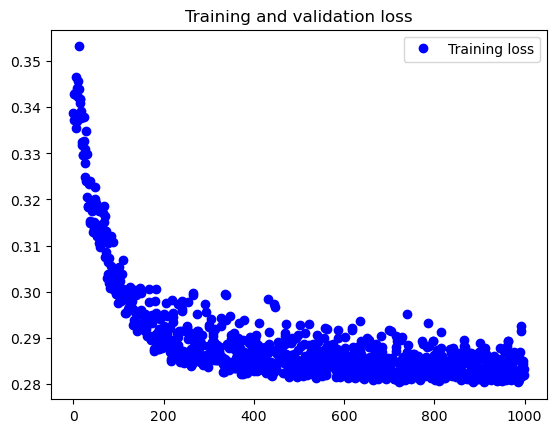

In [66]:
epochs = range(1000)
plt.figure()
plt.plot(epochs, losshistory, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [67]:
preds = autoencoder.predict(xtest)

83/83 [==============================] - 0s 435us/step


2024-06-05 23:48:46.244826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [2649,334]
	 [[{{node Placeholder/_10}}]]
2024-06-05 23:48:46.244983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [2649,334]
	 [[{{node Placeholder/_10}}]]


optimal mcc of 0.01672862207604281 at a threshold of 0.36


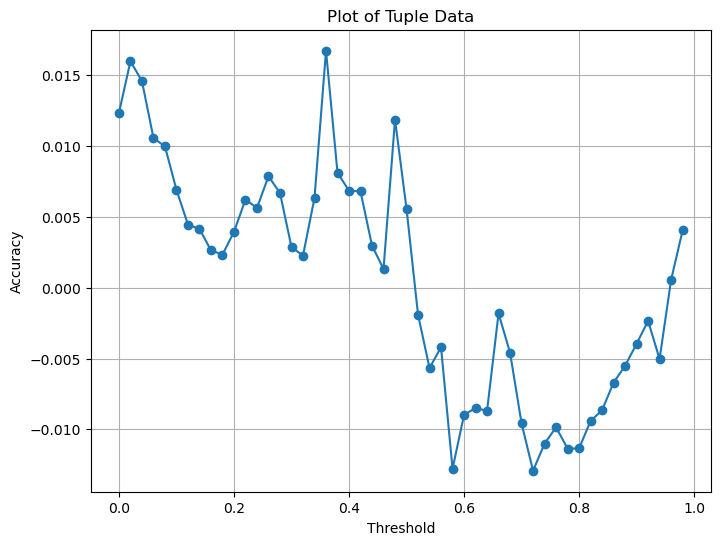

In [68]:
#acc curve creation
acclist = []
thresholdlist = []
maxval = 0
bestthresh = 0
for threshold in np.arange(0, 1, 0.02):
    newval = acccalc(preds, threshold, ytest)
    acclist.append(newval)
    thresholdlist.append(threshold)
    if newval > maxval:
        maxval = newval
        bestthresh = threshold

import matplotlib.pyplot as plt
y_values = acclist
x_values = thresholdlist

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')

print('optimal mcc of', maxval, 'at a threshold of', bestthresh)

# Add titles and labels
plt.title('Plot of Tuple Data')
plt.ylabel('Accuracy')
plt.xlabel('Threshold')

# Display the plot
plt.grid(True)
plt.show()

In [69]:
correctcount = 0
fpcount = 0
tpcount = 0
tncount = 0
fncount = 0
testpos = 0
testneg = 0

iterations = 0
for value in preds:
    testscore = ytest[iterations]
    if value > bestthresh:
        if testscore != 0:
            testpos = testpos + 1
            correctcount = correctcount + 1
            tpcount = tpcount + 1
        else:
            fpcount = fpcount + 1
            testneg = testneg + 1
    else:
        if testscore != 0:
            testpos = testpos + 1
            fncount = fncount + 1
        else:
            testneg = testneg + 1
            correctcount = correctcount + 1
            tncount = tncount + 1

    iterations = iterations + 1


print('positives in data', testpos)
print('negatives in data', testneg, '\n')

print('fn count =', fncount)
print('tn count =', tncount)

print('tp count =', tpcount)
print('fp count =', fpcount, '\n')

netfn = fncount / (fncount + tncount)
nettn = tncount / (fncount + tncount)
netacc = correctcount / (fpcount + fncount + tpcount + tncount)
posacc = tpcount / testpos
negacc = tncount / testneg
netfp = fpcount / (fpcount + tpcount)
nettp = tpcount / (tpcount + fpcount)

print('net accuracy =', netacc)
print('positive accuracy =', posacc)
print('negative accuracy =', negacc, '\n')

fpr = fpcount / (fpcount + tncount)
tpr = tpcount / (tpcount + fncount)

print('fpr =', fpr)
print('tpr =', tpr, '\n')

f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)
print('f1 score =',f1)

tp = tpcount
fp = fpcount
tn = tncount
fn = fncount

mcc = ((tp * tn) - (fp * fn)) / math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))

print('mcc =',mcc)

temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp

print('cohen Kappa =',kapp)

positives in data 1075
negatives in data 1574 

fn count = 539
tn count = 816
tp count = 536
fp count = 758 

net accuracy = 0.5103812759531898
positive accuracy = 0.4986046511627907
negative accuracy = 0.5184243964421855 

fpr = 0.4815756035578145
tpr = 0.4986046511627907 

f1 score = 0.45251160827353315
mcc = 0.01672862207604281
cohen Kappa = 0.016496339792310084


In [28]:
#Function to calculate net accuracy in relation to threshold
import math
def acccalc(predictions, threshold, toxtest):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0

    loops = 0
    for pred in predictions:
        predtox = pred[0]
        realtox = toxtest[loops]
        if predtox > threshold:
            if realtox != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if realtox != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        loops = loops + 1
        
    #netfn = fncount / (fncount + tncount)
    #nettn = tncount / (fncount + tncount)
    #netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    #posacc = tpcount / testpos
    #negacc = tncount / testneg
    #netfp = fpcount / (fpcount + tpcount)
    #nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    return mcc
